In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-forecasting-week-5/submission.csv
/kaggle/input/covid19-global-forecasting-week-5/test.csv
/kaggle/input/covid19-global-forecasting-week-5/train.csv


In [2]:
train = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/train.csv",)
test = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/test.csv")
sample = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-5/submission.csv")

In [3]:
train.set_index("Id",inplace=True)
train.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,,,
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
5,NaN,NaN,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [4]:
train.shape

(748008, 8)

In [5]:
test.set_index("ForecastId",inplace=True)
test.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target
ForecastId,,,,,,,
1,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
2,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
3,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
4,NaN,NaN,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
5,NaN,NaN,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


# Missing values

In [6]:
train.isnull().sum()

County            69120
Province_State    40392
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
TargetValue           0
dtype: int64

In [7]:
test.isnull().sum()

County            28800
Province_State    16830
Country_Region        0
Population            0
Weight                0
Date                  0
Target                0
dtype: int64

In [8]:
train["Province_State"].replace(np.nan, 'Unknown', inplace= True)

In [9]:
test["Province_State"].replace(np.nan, 'Unknown', inplace= True)

In [10]:
train["County"].replace(np.nan, 'Unknown', inplace= True)

In [11]:
test["County"].replace(np.nan, 'Unknown', inplace= True)

In [12]:
train.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target,TargetValue
Id,,,,,,,,
1,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-01-23,ConfirmedCases,0.0
2,Unknown,Unknown,Afghanistan,27657145,0.583587,2020-01-23,Fatalities,0.0
3,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-01-24,ConfirmedCases,0.0
4,Unknown,Unknown,Afghanistan,27657145,0.583587,2020-01-24,Fatalities,0.0
5,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-01-25,ConfirmedCases,0.0


In [13]:
test.head()

,County,Province_State,Country_Region,Population,Weight,Date,Target
ForecastId,,,,,,,
1,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-04-27,ConfirmedCases
2,Unknown,Unknown,Afghanistan,27657145,0.583587,2020-04-27,Fatalities
3,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-04-28,ConfirmedCases
4,Unknown,Unknown,Afghanistan,27657145,0.583587,2020-04-28,Fatalities
5,Unknown,Unknown,Afghanistan,27657145,0.058359,2020-04-29,ConfirmedCases


# Categorical data

In [14]:
train.dtypes

County             object
Province_State     object
Country_Region     object
Population          int64
Weight            float64
Date               object
Target             object
TargetValue       float64
dtype: object

In [15]:
train['Date'] = pd.to_datetime(train.Date)

In [16]:
from datetime import datetime as dt
train['week'] = train['Date'].dt.week
train['month'] = train['Date'].dt.month
train['year'] = train['Date'].dt.year

In [17]:
train.drop("Date",axis=1,inplace=True)

In [18]:
test['Date'] = pd.to_datetime(test.Date)
from datetime import datetime as dt
test['week'] = test['Date'].dt.week
test['month'] = test['Date'].dt.month
test['year'] = test['Date'].dt.year
test.drop("Date",axis=1,inplace=True)

In [19]:
train.head()

,County,Province_State,Country_Region,Population,Weight,Target,TargetValue,week,month,year
Id,,,,,,,,,,
1,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,0.0,4,1,2020
2,Unknown,Unknown,Afghanistan,27657145,0.583587,Fatalities,0.0,4,1,2020
3,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,0.0,4,1,2020
4,Unknown,Unknown,Afghanistan,27657145,0.583587,Fatalities,0.0,4,1,2020
5,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,0.0,4,1,2020


In [20]:
test.head()

,County,Province_State,Country_Region,Population,Weight,Target,week,month,year
ForecastId,,,,,,,,,
1,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,18,4,2020
2,Unknown,Unknown,Afghanistan,27657145,0.583587,Fatalities,18,4,2020
3,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,18,4,2020
4,Unknown,Unknown,Afghanistan,27657145,0.583587,Fatalities,18,4,2020
5,Unknown,Unknown,Afghanistan,27657145,0.058359,ConfirmedCases,18,4,2020


In [21]:
cat_column  = [col for col in train.columns if train[col].dtypes == 'object']

In [22]:
cat_column_other = [col for col in cat_column if not col == 'Target']
cat_column_other

['County', 'Province_State', 'Country_Region']

In [23]:
cat_column_target = [col for col in cat_column if col == 'Target']
cat_column_target

['Target']

In [24]:
import category_encoders as ce
target_enc = ce.CatBoostEncoder(cols=cat_column_other)
train[cat_column_other] = target_enc.fit_transform(train[cat_column_other],train['TargetValue'])
test[cat_column_other] = target_enc.transform(test[cat_column_other])

In [25]:
train = pd.get_dummies(train, columns=["Target"], prefix=["Type_is"] )
test = pd.get_dummies(test, columns=["Target"], prefix=["Type_is"] )

In [26]:
train.head()

,County,Province_State,Country_Region,Population,Weight,TargetValue,week,month,year,Type_is_ConfirmedCases,Type_is_Fatalities
Id,,,,,,,,,,,
1,9.672808,9.672808,9.672808,27657145,0.058359,0.0,4,1,2020,1,0
2,4.836404,4.836404,4.836404,27657145,0.583587,0.0,4,1,2020,0,1
3,3.224269,3.224269,3.224269,27657145,0.058359,0.0,4,1,2020,1,0
4,2.418202,2.418202,2.418202,27657145,0.583587,0.0,4,1,2020,0,1
5,1.934562,1.934562,1.934562,27657145,0.058359,0.0,4,1,2020,1,0


In [27]:
import matplotlib.pyplot as plt

plot of County is:


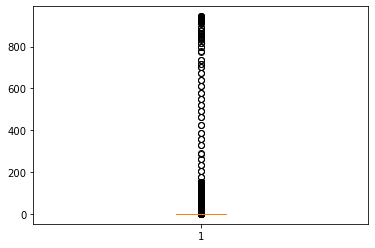

plot of Province_State is:


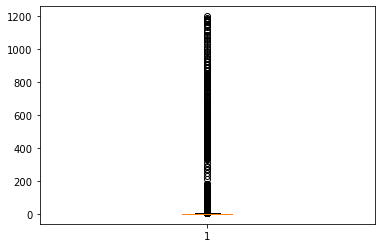

plot of Country_Region is:


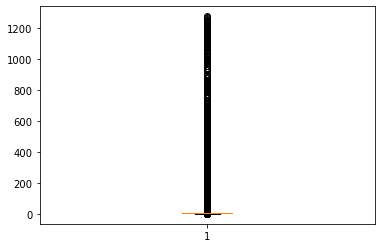

plot of Population is:


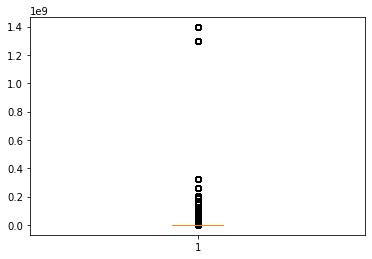

plot of Weight is:


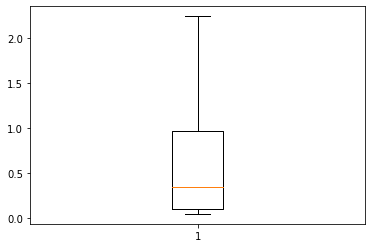

plot of TargetValue is:


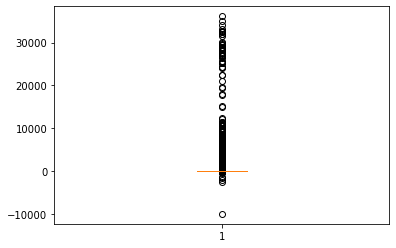

plot of week is:


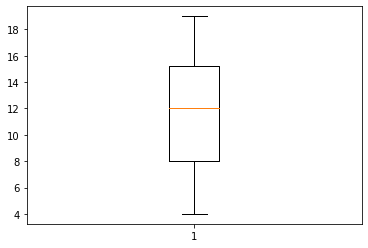

plot of month is:


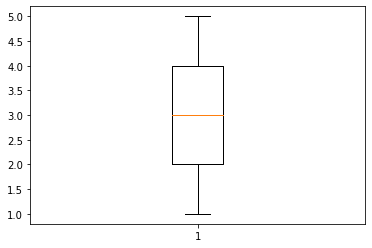

plot of year is:


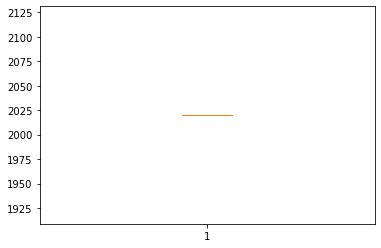

plot of Type_is_ConfirmedCases is:


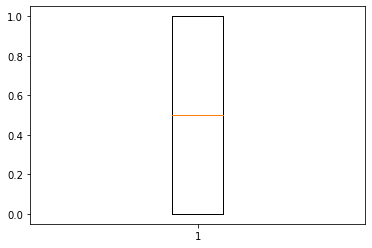

plot of Type_is_Fatalities is:


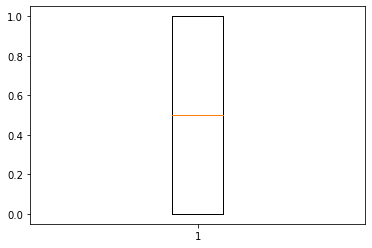

In [28]:
for col in train.columns:
    print('plot of {} is:'.format(col))
    plt.boxplot(train[col])
    plt.show()

In [29]:
Q1 = train.quantile(0.07)
Q3 = train.quantile(0.93)
IQR = Q3 - Q1
print(IQR)

County                    3.541085e+01
Province_State            2.007192e+01
Country_Region            3.903787e+00
Population                1.798345e+06
Weight                    1.050698e+00
TargetValue               3.000000e+00
week                      1.300000e+01
month                     4.000000e+00
year                      0.000000e+00
Type_is_ConfirmedCases    1.000000e+00
Type_is_Fatalities        1.000000e+00
dtype: float64


In [30]:
train.shape

(748008, 11)

In [31]:
train1 = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train1.shape

(674139, 11)

In [32]:
train.head()

,County,Province_State,Country_Region,Population,Weight,TargetValue,week,month,year,Type_is_ConfirmedCases,Type_is_Fatalities
Id,,,,,,,,,,,
1,9.672808,9.672808,9.672808,27657145,0.058359,0.0,4,1,2020,1,0
2,4.836404,4.836404,4.836404,27657145,0.583587,0.0,4,1,2020,0,1
3,3.224269,3.224269,3.224269,27657145,0.058359,0.0,4,1,2020,1,0
4,2.418202,2.418202,2.418202,27657145,0.583587,0.0,4,1,2020,0,1
5,1.934562,1.934562,1.934562,27657145,0.058359,0.0,4,1,2020,1,0


In [33]:
test.head()

,County,Province_State,Country_Region,Population,Weight,week,month,year,Type_is_ConfirmedCases,Type_is_Fatalities
ForecastId,,,,,,,,,,
1,84.772597,106.42311,19.159783,27657145,0.058359,18,4,2020,1,0
2,84.772597,106.42311,19.159783,27657145,0.583587,18,4,2020,0,1
3,84.772597,106.42311,19.159783,27657145,0.058359,18,4,2020,1,0
4,84.772597,106.42311,19.159783,27657145,0.583587,18,4,2020,0,1
5,84.772597,106.42311,19.159783,27657145,0.058359,18,4,2020,1,0


In [34]:
# from sklearn.preprocessing import LabelEncoder
# labelencoder = LabelEncoder()
# for col in cat_column:
#     train[col] = labelencoder.fit_transform(train[col])
#     test[col] = labelencoder.fit_transform(test[col])

In [35]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [36]:
X = train1.drop('TargetValue', axis=1).copy()
X = std.fit_transform(X)

In [37]:
y = train1['TargetValue'].copy()

In [38]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,train_size=0.80, test_size=0.20,random_state = 0)

In [39]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# rf =  RandomForestRegressor(n_jobs=-1,verbose=1)
# rf.fit(train_X , train_y)

In [40]:
# prediction = rf.predict(val_X)

In [41]:
# from sklearn.metrics import mean_absolute_error
# val_mae = mean_absolute_error(prediction,val_y)
# print(val_mae)

In [42]:
# import xgboost
# xgb_model = xgboost.XGBRegressor()
# xgb_model.fit(train_X , train_y)
# pred_out = xgb_model.predict(val_X)

In [43]:
# from sklearn.metrics import mean_absolute_error
# val_mae = mean_absolute_error(pred_out,val_y)
# print(val_mae)

In [44]:
# from sklearn.neighbors import KNeighborsRegressor
# # for i in range(1,10,1):
# neigh = KNeighborsRegressor()
# neigh.fit(train_X,train_y)
# predict_n = neigh.predict(val_X)
# print('Mean absolute error: %.2f'
#      % mean_absolute_error(val_y,predict_n))

In [45]:
import lightgbm as lgb 
lg = lgb.LGBMRegressor()
lg = lg.fit(train_X,train_y)
predict_l = lg.predict(val_X)
print('Mean absolute error: %.2f'
     % np.sqrt(mean_absolute_error(val_y,predict_l)))

NameError: name 'mean_absolute_error' is not defined

In [46]:
# from catboost import CatBoostRegressor

# model = CatBoostRegressor()
# #train the model
# model.fit(train_X,train_y)
# # make the prediction using the resulting model
# preds = model.predict(val_X)
# print('Mean absolute error: %.2f'
#      % np.sqrt(mean_absolute_error(val_y,preds)))

In [47]:
test1 = std.fit_transform(test)

In [48]:
predict = lg.predict(test1)

In [49]:
prediction_list = [int(x) for x in predict]

In [50]:
prediction_list

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [51]:
sub = pd.DataFrame({'Id': test.index , 'TargetValue': prediction_list})

In [52]:
sub['TargetValue'].value_counts()

0    299710
1      7937
2      3826
3       164
4        33
Name: TargetValue, dtype: int64

In [53]:
p=sub.groupby(['Id'])['TargetValue'].quantile(q=0.05).reset_index()
q=sub.groupby(['Id'])['TargetValue'].quantile(q=0.5).reset_index()
r=sub.groupby(['Id'])['TargetValue'].quantile(q=0.95).reset_index()

In [54]:
p.columns = ['Id' , 'q0.05']
q.columns = ['Id' , 'q0.5']
r.columns = ['Id' , 'q0.95']

In [55]:
p = pd.concat([p,q['q0.5'] , r['q0.95']],1)

In [56]:
p['q0.05']=p['q0.05'].clip(0,10000)
p['q0.05']=p['q0.5'].clip(0,10000)
p['q0.05']=p['q0.95'].clip(0,10000)
p

,Id,q0.05,q0.5,q0.95
0,1,0.0,0.0,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,0.0
3,4,0.0,0.0,0.0
4,5,0.0,0.0,0.0
...,...,...,...,...
311665,311666,2.0,2.0,2.0
311666,311667,2.0,2.0,2.0
311667,311668,2.0,2.0,2.0
311668,311669,2.0,2.0,2.0


In [57]:
sub=pd.melt(p, id_vars=['Id'], value_vars=['q0.05','q0.5','q0.95'])
sub['variable']=sub['variable'].str.replace("q","", regex=False)
sub['ForecastId_Quantile']=sub['Id'].astype(str)+'_'+sub['variable']
sub['TargetValue']=sub['value']
sub=sub[['ForecastId_Quantile','TargetValue']]
sub.reset_index(drop=True,inplace=True)
sub.to_csv("submission.csv",index=False)
sub

,ForecastId_Quantile,TargetValue
0,1_0.05,0.0
1,2_0.05,0.0
2,3_0.05,0.0
3,4_0.05,0.0
4,5_0.05,0.0
...,...,...
935005,311666_0.95,2.0
935006,311667_0.95,2.0
935007,311668_0.95,2.0
935008,311669_0.95,2.0
